#Practica 2

## Ejercicio 1

###Mostrar mediante ejempos los efectos que se producen en el histograma de imagen al modificarle su brillo y su contraste 

Vamos a implementar la función que aparece en el libro Gonzalez-Goods 

In [1]:
import Color, FixedPointNumbers, PyPlot

INFO: Loading help data...


In [9]:
using Cartesian, Images

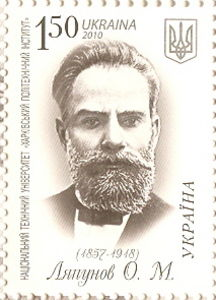

In [11]:
img = imread("../Imagenes/ALyapunov-mathematician.jpg")

In [12]:
img_gray = convert(Array{Images.Gray}, img);

In [13]:

@time _, counts = hist(img_gray[:], -1/256:1/256:1)

elapsed time: 0.113050697 seconds (2960088 bytes allocated, 76.37% gc time)


(-0.00390625:0.00390625:1.0,[0,0,0,0,0,0,0,0,0,0  …  788,913,1173,1386,1773,2584,4394,7529,12227,3870])

In [7]:
function imadjust2(img, low_in, hig_in, low_out, hig_out, γ)
    #out = similar(Images.separate(img))
    
    slow_out + (hig_out - low_out) * ((img - low_in) / (hig_in - low_in)) .^ γ
    return out
end

    

imadjust2 (generic function with 1 method)

In [8]:
O = imadjust2(img_gray,.5, .75, .3, 1, .2)

LoadError: `^` has no method matching ^(::Gray{Float64}, ::Float64)
while loading In[8], in expression starting on line 1